### The Garoppolo Effect: Exploring NFL Data using Python

Jimmy Garoppolo just signed the largest contract in NFL history with the San Francisco 49ers. He started 5 games for them after being traded midseason and led the 49ers to wins in all of these games.

I wanted to explore how the 49ers team changed after Garoppolo was traded and understand a bit more about how he helped the team. For this analysis, I used a dataset about 2017 NFL plays. You can get the data using NFL scrapeR, which was created by ( https://github.com/maksimhorowitz/nflscrapR ). I used this tool to download NFL play by play data for 2017 and have included a direct link to where the 2017 NFL data can be downloaded ( https://raw.githubusercontent.com/ryurko/nflscrapR-data/master/data/season_play_by_play/pbp_2017.csv ).

For our purposes, we are just going to focus on the 49ers data for the 2017 season, and this is a walkthrough about how to do that. I have included some comments within the code to help you follow along. Since Jimmy Garoppolo only started 5 games for the 49ers, these plots will not all have a similar number of observations, but let's see what interesting things we can learn.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
from matplotlib import cm
plt.style.use('ggplot')

%matplotlib inline

from __future__ import division

In [2]:
nfl = pd.read_csv('https://raw.githubusercontent.com/ryurko/nflscrapR-data/master/data/season_play_by_play/pbp_2017.csv', low_memory=False)

Take a look at the dimensions of the data.

In [3]:
nfl.shape

(45241, 102)

Because we want to compare how the team performed before and after the trade, we can add an additional column that indicates that a date was before or after the date when Jimmy Garoppolo started a game for the 49ers. Doing this will allow us to compare the data before and after as we can check for the value of the variable called Jimmy. 

First, we convert the date column to datetime format so that we can compare them with a date that we want to check against.

In [4]:
nfl['Date'] = pd.to_datetime(nfl['Date'])

Then we can create a column called Jimmy that is yes if the game date is on or after December 3rd, 2017 and is no otherwise.

In [5]:
nfl['Jimmy'] = np.where( nfl['Date']>=pd.datetime(2017,12,3), 'yes', 'no')

Now if we check our nfl dataframe, we will see that the last column is now Jimmy.

In [6]:
nfl.head()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season,Jimmy
0,2017-09-07,2017090700,1,1,NaN,15:00,15,3600.0,0.0,KC,...,0.500007,0.499993,0.506018,0.493982,0.500007,0.006011,NaN,NaN,2017,no
1,2017-09-07,2017090700,1,1,1.0,14:55,15,3595.0,5.0,NE,...,0.506018,0.493982,0.484055,0.515945,0.506018,-0.021963,0.068249,-0.090213,2017,no
2,2017-09-07,2017090700,1,1,2.0,14:49,15,3589.0,6.0,NE,...,0.484055,0.515945,0.510010,0.489990,0.484055,0.025955,-0.024329,0.050284,2017,no
3,2017-09-07,2017090700,1,1,3.0,14:14,15,3554.0,35.0,NE,...,0.510010,0.489990,0.552982,0.447018,0.510010,0.042972,NaN,NaN,2017,no
4,2017-09-07,2017090700,1,1,1.0,13:52,14,3532.0,22.0,NE,...,0.552982,0.447018,0.546975,0.453025,0.552982,-0.006007,NaN,NaN,2017,no


We can obtain 49ers specific data from the 2017 NFL data by subsetting the NFL data such that the home or away team is the SF 49ers.

In [7]:
niners = nfl[ (nfl["HomeTeam"] == 'SF') | (nfl["AwayTeam"] == 'SF') ]

Next, we can look into touchdowns scored. To check touchdown information, we can check that the home or away team is SF, a scoring play occurred, a touchdown occurred, the team on offense was SF, and there was no interceptor, who is a player who intercepted the ball.

In [8]:
niners_td = nfl[((nfl["HomeTeam"] == 'SF') | (nfl["AwayTeam"] == 'SF')) 
             & (nfl["sp"] == 1) & (nfl["Touchdown"] == 1) & (nfl["DefensiveTeam"] != 'SF') & pd.isnull(nfl["Interceptor"]) ]

And we get 31 touchdowns for the season.

In [9]:
len(niners_td)

31

Now we can check how many touchdowns were scored without Jimmy and with him by subsetting our dataframe.

In [10]:
print len( niners_td[niners_td['Jimmy'] == 'no'] )
print len( niners_td[niners_td['Jimmy'] == 'yes'] )

18
13


Alternatively, we can also group by the Jimmy variable and check the same result like so:

In [11]:
niners_td.groupby('Jimmy').Touchdown.sum()

Jimmy
no     18
yes    13
Name: Touchdown, dtype: int64

Now let's graph the number of touchdowns scored while Jimmy started and did not start games.

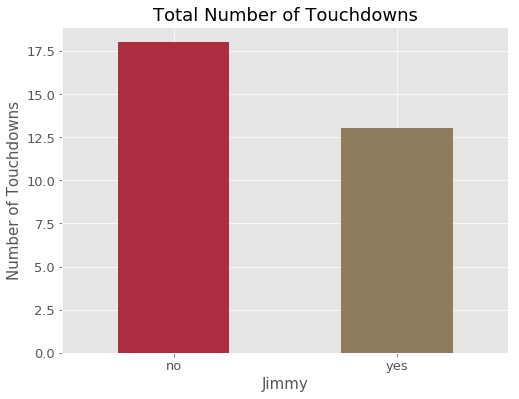

In [12]:
tds = niners_td.groupby('Jimmy').Touchdown.sum() # score the touchdown information in tds

fig, ax = plt.subplots(figsize=(8, 6), dpi = 72) # Get access to the figure and axes to modify their attributes later

ax.set_title("Total Number of Touchdowns", fontsize = 18) # Chart title
ax.set_xlabel('Jimmy', fontsize = 15) # X-axis label
ax.set_ylabel('Number of Touchdowns', fontsize = 15) # Y-axis label
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

mycolors = ['#A6192E', '#85714D'] # Using scarlet and gold colors

tds.plot(kind='bar', alpha = 0.9, rot=0, color = mycolors) # Plot a Bar chart
plt.show()

While this plot is nice, we should also check the number of touchdowns per game since Jimmy only played in 5 games.

In [13]:
# get the unique number of games Jimmy did not play in
pre_number = len( niners[niners['Jimmy'] == 'no']['GameID'].unique() )
print pre_number

11


In [14]:
# get the unique number of games that Jimmy did play in
post_number = len( niners[niners['Jimmy'] == 'yes']['GameID'].unique() )
print post_number

5


In [15]:
print "Before Jimmy, the amount of touchdowns per game was %.2f" % (18/pre_number)
print "After Jimmy, the amount of touchdowns per game was %.2f" % (13/post_number)

Before Jimmy, the amount of touchdowns per game was 1.64
After Jimmy, the amount of touchdowns per game was 2.60


We can see that the 49ers scored approximately 1 more touchdown per game when Jimmy Garoppolo started. This does not mean that he was responsible for every touchdown scored when he played, but this just shows the number of touchdowns that were scored when he played.

### Touchdowns and Interceptions over Time

To get a different point of view about the touchdown situation, we can take a time-series approach where we take a look at the number of touchdowns and interceptions over time. We can mark off the point in time at which Garoppolo started games and see what changes we can observe.

In [16]:
# get sum of touchdowns by game day
td_by_date = niners.groupby('Date')['Touchdown'].sum()
td_by_date;

In [17]:
# get sum of interceptions by game day
inter_by_date = niners.groupby('Date')['InterceptionThrown'].sum()
inter_by_date;

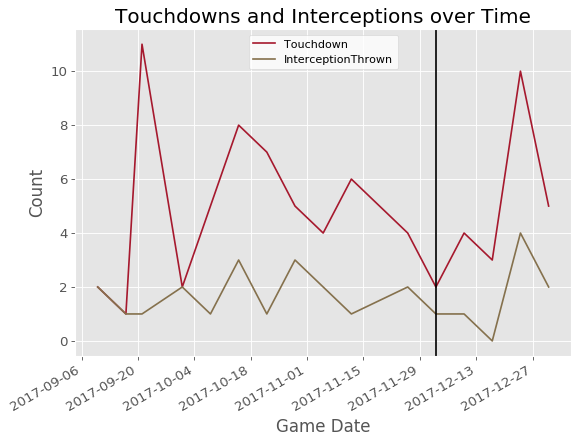

In [18]:
fig, ax = plt.subplots(figsize=(8, 6), dpi = 80) # set plot size 

mycolors = ['#A6192E', '#85714D'] # Using scarlet and gold colors

f1 = td_by_date.plot(color = mycolors[0]) # plot the touchdowns
f2 = inter_by_date.plot(color = mycolors[1]) # plot the interceptions

ax.set_title("Touchdowns and Interceptions over Time", fontsize = 18) # Chart title
ax.set_xlabel('Game Date', fontsize = 15) # X-axis label
ax.set_ylabel('Count', fontsize = 15) # Y-axis label
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.axvline(dt.datetime(2017, 12, 3), color = 'black') # add a vertical line
plt.legend(loc='upper center', frameon=True, facecolor="white") # add a legend with a white background

plt.show()

The lines to the right of the black vertical line are games that Jimmy started. We notice that before he started for the 49ers, they were on a downward trend in terms of the number of touchdowns scored, and after he started, their offense started taking off again.

### Comparison of Different Play Types

To compare different playtypes, we use the niners dataframe and not the niners_td dataframe defined above because we are concerned with overall plays in the game and not just the plays that occur when the 49ers are on offense. 

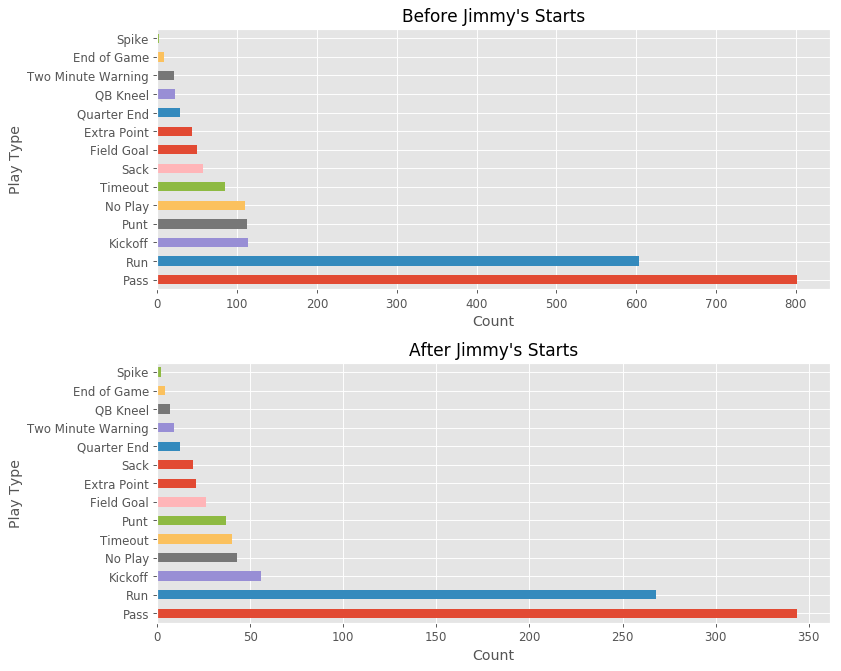

In [19]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8), dpi = 85) # specify a plot with 2 rows and 1 column

# get plays where Jimmy did not start and did start
f1 = niners[niners['Jimmy']=='no']['PlayType'].value_counts().plot(kind='barh', ax=ax[0]) 
f2 = niners[niners['Jimmy']=='yes']['PlayType'].value_counts().plot(kind='barh', ax=ax[1])

f1.set(title = "Before Jimmy's Starts", xlabel='Count', ylabel='Play Type')
f2.set(title = "After Jimmy's Starts", xlabel='Count', ylabel='Play Type')

fig.tight_layout() # prevent overlapping axis labels

plt.show()

There are a different number of games and therefore count of plays, of course, but if we use the colors in both plots to match up which play was most frequent, we see that in both graphs, the most common plays were Pass, Run, and Kickoff, but then we notice that punts were more common before Jimmy started whereas field goals were more common after Jimmy started. This could indicate that Jimmy's play could have helped the 49ers get closer to scoring position and the chance to score more field goals.

### Lastly, let's dive deeper into the data about the 49ers offense.

Let's take a look at the top plays in terms of yards gained when the 49ers were on offense. As before, we will subset our data to obtain data when the 49ers are on offense.

In [20]:
niners_offense = nfl[((nfl["HomeTeam"] == 'SF') | (nfl["AwayTeam"] == 'SF')) 
                     & (nfl["DefensiveTeam"] != 'SF') ] 

We can create a new dataframe called most_yards that takes the 50 observations where the 49ers offense gained the most amount of yards.

In [21]:
most_yards = niners_offense.sort_values(by='Yards.Gained', ascending=False)[:50]

In [22]:
most_yards.groupby("Jimmy").Jimmy.value_counts()

Jimmy  Jimmy
no     no       30
yes    yes      20
Name: Jimmy, dtype: int64

We can see that 20 of these 50 top plays by yards gained occurred when Jimmy started, but since the number of the occurrences differ, we will look at overall values instead of separating the plots as before since these different observations can lead to a varying number of bars in bar plots for instance.

In [23]:
# Take a look at 10 observations with the following fields
most_yards[['Date','PlayType','Yards.Gained','qtr','desc','Rusher','Receiver', 'Jimmy']][:10]

,Date,PlayType,Yards.Gained,qtr,desc,Rusher,Receiver,Jimmy
25449,2017-11-12,Pass,83,2,(8:10) C.Beathard pass deep middle to M.Goodwi...,NaN,M.Goodwin,no
32892,2017-12-03,Punt,67,4,(10:56) (Punt formation) B.Pinion punts 28 yar...,NaN,NaN,yes
34961,2017-12-10,Pass,61,3,(4:22) (Shotgun) J.Garoppolo pass short middle...,NaN,G.Celek,yes
4590,2017-09-17,Run,61,2,(3:54) C.Hyde left tackle to SEA 22 for 61 yar...,C.Hyde,NaN,no
32831,2017-12-03,Punt,61,2,(6:12) (Punt formation) B.Pinion punts 44 yard...,NaN,NaN,yes
5559,2017-09-21,Pass,59,4,(6:35) B.Hoyer pass deep left to P.Garcon to L...,NaN,P.Garcon,no
22566,2017-11-05,Pass,55,1,(1:38) C.Beathard pass deep right to M.Goodwin...,NaN,M.Goodwin,no
39076,2017-12-17,Pass,54,4,(6:28) J.Garoppolo pass short middle to K.Bour...,NaN,K.Bourne,yes
11814,2017-10-08,Pass,51,4,(9:22) (No Huddle) B.Hoyer pass deep middle to...,NaN,M.Goodwin,no
5531,2017-09-21,Pass,50,3,(:17) B.Hoyer pass deep middle to M.Goodwin to...,NaN,M.Goodwin,no


We notice that Goodwin was the receiver who was part of the plays resulting in the most yards last season.

In [24]:
passes = most_yards[most_yards["PlayType"] == 'Pass']

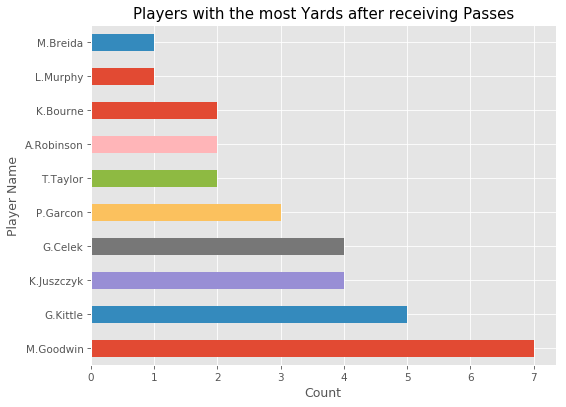

In [25]:
fig, ax = plt.subplots(figsize=(8, 6), dpi = 75)

f1 = passes['Receiver'].value_counts().plot(kind='barh')
f1.set(title = "Players with the most Yards after receiving Passes", xlabel='Count', ylabel='Player Name')

plt.show()

In [26]:
runs = most_yards[most_yards['PlayType'] == 'Run']

We can see that Breida and Hyde were part of the most successful runs by yards gained last season.

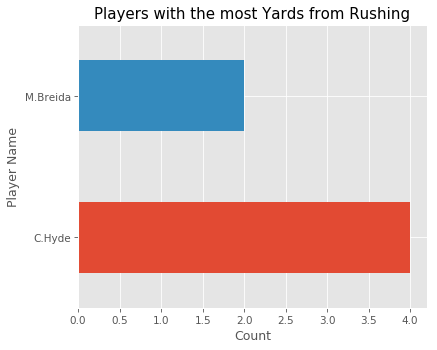

In [27]:
fig, ax = plt.subplots(figsize=(6, 5), dpi = 75)

f1 = runs['Rusher'].value_counts().plot(kind='barh')
f1.set(title = "Players with the most Yards from Rushing", xlabel='Count', ylabel='Player Name')

plt.show()

Conclusion

I hope that you enjoyed this guide walking through some data analysis in Python using NFL data. Now you can go download the NFL data, play around with different information, and see what interesting things you find!

Thank you for taking the time to read this post, and feel free to leave a comment or connect on LinkedIn.

References:

1. Pandas Data Frame Documentation https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html

2. Pandas Plot Documentation https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html

3. Matplotlib Documentation https://matplotlib.org/tutorials/introductory/sample_plots.html#sphx-glr-tutorials-introductory-sample-plots-py

4. NFL ScrapeR https://github.com/maksimhorowitz/nflscrapR

5. Personal Github Repository with this code notebook 